# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720710348014e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [26]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447687e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714960793873202


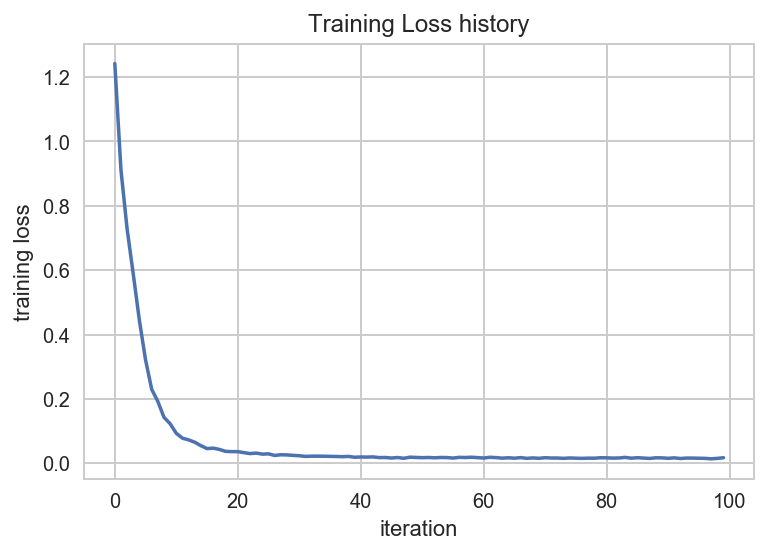

In [55]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [56]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [63]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302916
iteration 100 / 1000: loss 2.302061
iteration 200 / 1000: loss 2.296418
iteration 300 / 1000: loss 2.260497
iteration 400 / 1000: loss 2.158511
iteration 500 / 1000: loss 2.074585
iteration 600 / 1000: loss 2.076072
iteration 700 / 1000: loss 2.059758
iteration 800 / 1000: loss 1.969625
iteration 900 / 1000: loss 1.938391
Validation accuracy:  0.284


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

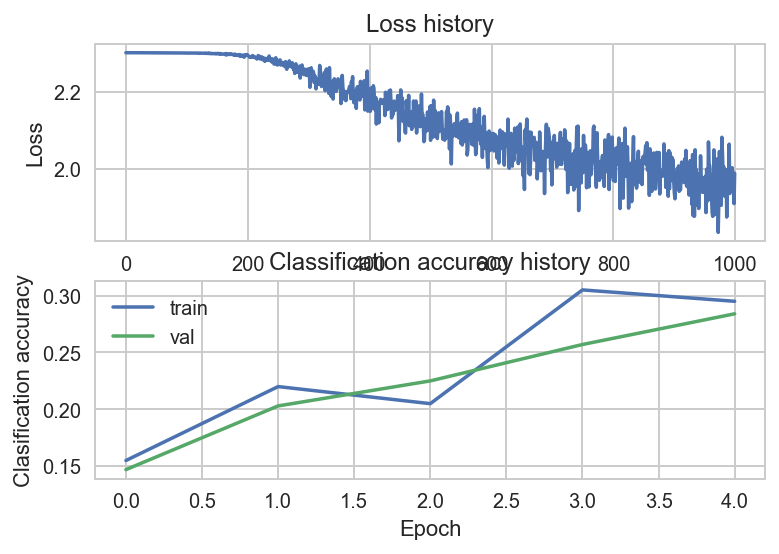

In [66]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

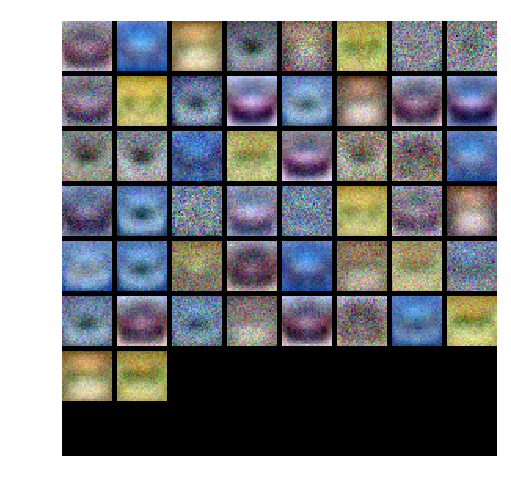

In [67]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [93]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
hidden_ls = [25, 50, 100]
iter_ls = [500, 1000, 3000]
lr_ls = [1e-4, 3e-3, 1e-3]
reg_ls = [0.03, 0.1, 0.25, 0.5]
best_acc = 0
for hidden in hidden_ls:
    for itering in iter_ls:
        for lr in lr_ls:
            for reg in reg_ls:
                net = TwoLayerNet(input_size, hidden, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=itering, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=True)
                val_acc = (net.predict(X_val) == y_val).mean()
                print("hidden: ", hidden, "iter: ", itering, "learning_rate: ", lr, "reg: ", reg, "acc: ", val_acc)
                if val_acc > best_acc:
                    best_acc = val_acc
                    best_net_params = [hidden, itering, lr, reg]
                    
best_net = TwoLayerNet(input_size, best_net_params[0], num_classes)

best_stats = best_net.train(X_train, y_train, X_val, y_val,
        num_iters=best_net_params[1], batch_size=200,
        learning_rate=best_net_params[2], learning_rate_decay=0.95,
        reg=best_net_params[3], verbose=True)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 500: loss 2.302599
iteration 100 / 500: loss 2.302291
iteration 200 / 500: loss 2.299664
iteration 300 / 500: loss 2.274397
iteration 400 / 500: loss 2.187342
hidden:  25 iter:  500 learning_rate:  0.0001 reg:  0.03 acc:  0.225
iteration 0 / 500: loss 2.302657
iteration 100 / 500: loss 2.302419
iteration 200 / 500: loss 2.300090
iteration 300 / 500: loss 2.282191
iteration 400 / 500: loss 2.219907
hidden:  25 iter:  500 learning_rate:  0.0001 reg:  0.1 acc:  0.206
iteration 0 / 500: loss 2.302779
iteration 100 / 500: loss 2.302547
iteration 200 / 500: loss 2.300287
iteration 300 / 500: loss 2.276175
iteration 400 / 500: loss 2.199768
hidden:  25 iter:  500 learning_rate:  0.0001 reg:  0.25 acc:  0.192
iteration 0 / 500: loss 2.302980
iteration 100 / 500: loss 2.302730
iteration 200 / 500: loss 2.299865
iteration 300 / 500: loss 2.287472
iteration 400 / 500: loss 2.232815
hidden:  25 iter:  500 learning_rate:  0.0001 reg:  0.5 acc:  0.203
iteration 0 / 500: loss 2.302605
i

iteration 600 / 3000: loss 2.140026
iteration 700 / 3000: loss 2.090953
iteration 800 / 3000: loss 2.051941
iteration 900 / 3000: loss 2.093985
iteration 1000 / 3000: loss 1.959412
iteration 1100 / 3000: loss 1.891219
iteration 1200 / 3000: loss 1.962148
iteration 1300 / 3000: loss 1.946702
iteration 1400 / 3000: loss 1.851037
iteration 1500 / 3000: loss 1.978186
iteration 1600 / 3000: loss 1.888803
iteration 1700 / 3000: loss 1.882999
iteration 1800 / 3000: loss 1.776862
iteration 1900 / 3000: loss 1.877973
iteration 2000 / 3000: loss 1.826382
iteration 2100 / 3000: loss 1.897684
iteration 2200 / 3000: loss 1.767334
iteration 2300 / 3000: loss 1.756570
iteration 2400 / 3000: loss 1.776726
iteration 2500 / 3000: loss 1.680057
iteration 2600 / 3000: loss 1.752895
iteration 2700 / 3000: loss 1.831643
iteration 2800 / 3000: loss 1.726409
iteration 2900 / 3000: loss 1.735599
hidden:  25 iter:  3000 learning_rate:  0.0001 reg:  0.03 acc:  0.379
iteration 0 / 3000: loss 2.302665
iteration 10

iteration 700 / 3000: loss 1.880631
iteration 800 / 3000: loss 1.723757
iteration 900 / 3000: loss 1.712414
iteration 1000 / 3000: loss 1.741694
iteration 1100 / 3000: loss 1.702667
iteration 1200 / 3000: loss 1.865086
iteration 1300 / 3000: loss 1.643542
iteration 1400 / 3000: loss 1.794997
iteration 1500 / 3000: loss 1.507996
iteration 1600 / 3000: loss 1.708530
iteration 1700 / 3000: loss 1.780924
iteration 1800 / 3000: loss 1.648952
iteration 1900 / 3000: loss 1.753894
iteration 2000 / 3000: loss 1.594175
iteration 2100 / 3000: loss 1.504451
iteration 2200 / 3000: loss 1.620471
iteration 2300 / 3000: loss 1.527339
iteration 2400 / 3000: loss 1.539293
iteration 2500 / 3000: loss 1.682902
iteration 2600 / 3000: loss 1.640911
iteration 2700 / 3000: loss 1.612079
iteration 2800 / 3000: loss 1.771338
iteration 2900 / 3000: loss 1.675361
hidden:  25 iter:  3000 learning_rate:  0.003 reg:  0.5 acc:  0.47
iteration 0 / 3000: loss 2.302592
iteration 100 / 3000: loss 1.984598
iteration 200 /

iteration 100 / 500: loss 1.928881
iteration 200 / 500: loss 1.858395
iteration 300 / 500: loss 1.696768
iteration 400 / 500: loss 1.558822
hidden:  50 iter:  500 learning_rate:  0.001 reg:  0.5 acc:  0.441
iteration 0 / 1000: loss 2.302644
iteration 100 / 1000: loss 2.302282
iteration 200 / 1000: loss 2.298148
iteration 300 / 1000: loss 2.266270
iteration 400 / 1000: loss 2.176534
iteration 500 / 1000: loss 2.132221
iteration 600 / 1000: loss 2.045156
iteration 700 / 1000: loss 2.020828
iteration 800 / 1000: loss 2.028374
iteration 900 / 1000: loss 1.926196
hidden:  50 iter:  1000 learning_rate:  0.0001 reg:  0.03 acc:  0.281
iteration 0 / 1000: loss 2.302745
iteration 100 / 1000: loss 2.302349
iteration 200 / 1000: loss 2.300101
iteration 300 / 1000: loss 2.260744
iteration 400 / 1000: loss 2.197217
iteration 500 / 1000: loss 2.140512
iteration 600 / 1000: loss 2.047700
iteration 700 / 1000: loss 2.090614
iteration 800 / 1000: loss 2.029463
iteration 900 / 1000: loss 2.018889
hidden:

iteration 1500 / 3000: loss 1.882798
iteration 1600 / 3000: loss 1.821521
iteration 1700 / 3000: loss 1.763583
iteration 1800 / 3000: loss 1.889583
iteration 1900 / 3000: loss 1.816600
iteration 2000 / 3000: loss 1.810656
iteration 2100 / 3000: loss 1.794116
iteration 2200 / 3000: loss 1.699451
iteration 2300 / 3000: loss 1.753519
iteration 2400 / 3000: loss 1.746280
iteration 2500 / 3000: loss 1.733820
iteration 2600 / 3000: loss 1.712250
iteration 2700 / 3000: loss 1.654446
iteration 2800 / 3000: loss 1.755990
iteration 2900 / 3000: loss 1.698932
hidden:  50 iter:  3000 learning_rate:  0.0001 reg:  0.25 acc:  0.383
iteration 0 / 3000: loss 2.303389
iteration 100 / 3000: loss 2.302910
iteration 200 / 3000: loss 2.299008
iteration 300 / 3000: loss 2.260960
iteration 400 / 3000: loss 2.219286
iteration 500 / 3000: loss 2.149393
iteration 600 / 3000: loss 2.109118
iteration 700 / 3000: loss 1.981063
iteration 800 / 3000: loss 2.053843
iteration 900 / 3000: loss 1.960154
iteration 1000 / 

iteration 1600 / 3000: loss 1.369869
iteration 1700 / 3000: loss 1.394083
iteration 1800 / 3000: loss 1.404400
iteration 1900 / 3000: loss 1.347382
iteration 2000 / 3000: loss 1.318775
iteration 2100 / 3000: loss 1.343976
iteration 2200 / 3000: loss 1.439095
iteration 2300 / 3000: loss 1.310163
iteration 2400 / 3000: loss 1.385288
iteration 2500 / 3000: loss 1.299099
iteration 2600 / 3000: loss 1.336584
iteration 2700 / 3000: loss 1.298743
iteration 2800 / 3000: loss 1.249769
iteration 2900 / 3000: loss 1.395625
hidden:  50 iter:  3000 learning_rate:  0.001 reg:  0.1 acc:  0.497
iteration 0 / 3000: loss 2.302957
iteration 100 / 3000: loss 1.855335
iteration 200 / 3000: loss 1.862634
iteration 300 / 3000: loss 1.672156
iteration 400 / 3000: loss 1.718208
iteration 500 / 3000: loss 1.652116
iteration 600 / 3000: loss 1.577559
iteration 700 / 3000: loss 1.557543
iteration 800 / 3000: loss 1.518440
iteration 900 / 3000: loss 1.429879
iteration 1000 / 3000: loss 1.537330
iteration 1100 / 30

iteration 700 / 1000: loss 1.601641
iteration 800 / 1000: loss 1.548014
iteration 900 / 1000: loss 1.556955
hidden:  100 iter:  1000 learning_rate:  0.003 reg:  0.1 acc:  0.444
iteration 0 / 1000: loss 2.303348
iteration 100 / 1000: loss 1.709197
iteration 200 / 1000: loss 1.685722
iteration 300 / 1000: loss 1.752241
iteration 400 / 1000: loss 1.679336
iteration 500 / 1000: loss 1.732269
iteration 600 / 1000: loss 1.807953
iteration 700 / 1000: loss 1.551764
iteration 800 / 1000: loss 1.694429
iteration 900 / 1000: loss 1.540032
hidden:  100 iter:  1000 learning_rate:  0.003 reg:  0.25 acc:  0.46
iteration 0 / 1000: loss 2.304155
iteration 100 / 1000: loss 1.819422
iteration 200 / 1000: loss 1.808720
iteration 300 / 1000: loss 1.668027
iteration 400 / 1000: loss 1.960950
iteration 500 / 1000: loss 1.756444
iteration 600 / 1000: loss 1.807466
iteration 700 / 1000: loss 1.563138
iteration 800 / 1000: loss 1.827135
iteration 900 / 1000: loss 1.775638
hidden:  100 iter:  1000 learning_rate

iteration 2200 / 3000: loss 1.256226
iteration 2300 / 3000: loss 1.195357
iteration 2400 / 3000: loss 1.417738
iteration 2500 / 3000: loss 1.539237
iteration 2600 / 3000: loss 1.166488
iteration 2700 / 3000: loss 1.365316
iteration 2800 / 3000: loss 1.443427
iteration 2900 / 3000: loss 1.316589
hidden:  100 iter:  3000 learning_rate:  0.003 reg:  0.03 acc:  0.478
iteration 0 / 3000: loss 2.302889
iteration 100 / 3000: loss 1.828961
iteration 200 / 3000: loss 1.837452
iteration 300 / 3000: loss 1.578459
iteration 400 / 3000: loss 1.772424
iteration 500 / 3000: loss 1.565879
iteration 600 / 3000: loss 1.670409
iteration 700 / 3000: loss 1.636826
iteration 800 / 3000: loss 1.538666
iteration 900 / 3000: loss 1.655643
iteration 1000 / 3000: loss 1.983064
iteration 1100 / 3000: loss 1.762862
iteration 1200 / 3000: loss 1.479672
iteration 1300 / 3000: loss 1.587409
iteration 1400 / 3000: loss 1.410573
iteration 1500 / 3000: loss 1.393380
iteration 1600 / 3000: loss 1.421878
iteration 1700 / 

iteration 2300 / 3000: loss 1.516849
iteration 2400 / 3000: loss 1.420119
iteration 2500 / 3000: loss 1.474425
iteration 2600 / 3000: loss 1.496490
iteration 2700 / 3000: loss 1.516025
iteration 2800 / 3000: loss 1.476169
iteration 2900 / 3000: loss 1.540645
hidden:  100 iter:  3000 learning_rate:  0.001 reg:  0.5 acc:  0.524
iteration 0 / 3000: loss 2.302682
iteration 100 / 3000: loss 1.854926
iteration 200 / 3000: loss 1.762921
iteration 300 / 3000: loss 1.660886
iteration 400 / 3000: loss 1.570590
iteration 500 / 3000: loss 1.572306
iteration 600 / 3000: loss 1.597916
iteration 700 / 3000: loss 1.492756
iteration 800 / 3000: loss 1.379915
iteration 900 / 3000: loss 1.508822
iteration 1000 / 3000: loss 1.348971
iteration 1100 / 3000: loss 1.437672
iteration 1200 / 3000: loss 1.389545
iteration 1300 / 3000: loss 1.389005
iteration 1400 / 3000: loss 1.359819
iteration 1500 / 3000: loss 1.283656
iteration 1600 / 3000: loss 1.352074
iteration 1700 / 3000: loss 1.357454
iteration 1800 / 3

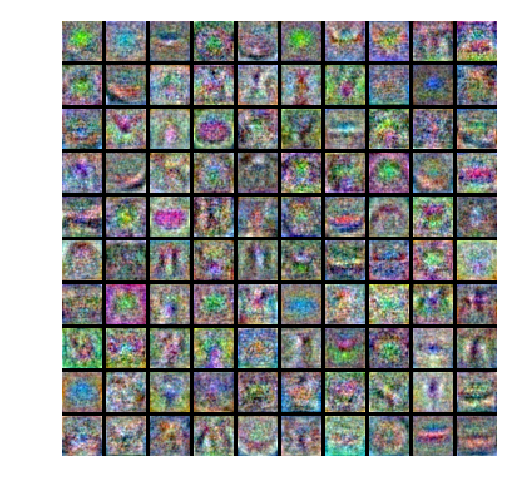

In [94]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [95]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.519


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*: 1, 3 <br/>
*Your explanation:* Testing accuracy is much lower than training accuracy means there is a chance of overfitting. If we have more datasets, our model can learn more information. It can solve the problem of overfitting. Increasing the regularization stength can make model generalize well, so it can solve the overfitting. But adding more hidden units can make overfitting more severe